# Linear/Non-Linear Models
## Final Project
### Group: Juan Bautista, Madeline Huynh, Natalie Kim, Luyao Xie
Due: Thursday, March 7, 2024

#### Project Overview:
Our goal is to predict the prices of various Airbnb rental listings. We will use a variety of data exploration methods to identify the any attributes that have the biggest influence on price. 

#### Data Overview:
**Background**: The dataset is publicly available on Kaggle: https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews/data

The data is a collection of Airbnb data for over 250,000 listings in 10 major cities, with 5 million reviews. Each of the prices are in local currency, so we will need to account for that. Excluding the name, listing_id, and host_id, there are a total of 34 inital covariates, which are listed below.

The 10 cities: 'Bangkok', 'Cape Town', 'Hong Kong', 'Istanbul', 'Mexico City', 'New York', 'Paris', 'Rio de Janeiro', 'Rome', 'Sydney'

Host Details
- `host_since`: Date the host joined Aribnb
- `host_location`: Location where the host is based
- `host_response_time`: Estimate of how long the host takes to respond
- `host_response_rate`: Percentage of times the host responds
- `host_acceptance_rate`: Percentage of times the host accepts a booking request
- `host_is_superhost`: Binary value to determine if host is Superhost
- `host_total_listings_count`: Total listings the host has in Airbnb
- `host_has_profile_pic`: Binary field to determine if host has a profile picture
- `host_identity_verified`: Binary field to determine if host has verified identity

Location
- `neighbourhood`: Neighborhood the listing is in
- `district`: District the listing is in
- `city`: City the listing is in
- `latitude`: Listing's latitude
- `longitude`: Listing's longitude

Property
- `property_type`: Type of Property for the listing
- `room_type`: Type of room type in Airbnb for listing
- `accommodates`: Number of guests the listing accomodates
- `bedrooms`: Number of bedrooms in the listing
- `amenities`: Amenities the listing includes
- `price`: Listing price (in each country's currency)
- `minimum_nights`: Minimum nights per booking
- `maximum_nights`: Maximum nights per booking
- `instant_bookable`: Binary value to determine if listing can be booked instantly

Reviews
- `review_scores_rating`: Overall rating (out of 100)
- `review_scores_accuracy`: Accuracy score based on what's promoted in Airbnb (out of 10)
- `review_scores_cleanliness`: Cleanliness score (out of 10)
- `review_scores_checkin`: Check-in experience score (out of 10) 
- `review_scores_communication`: Communication with the host score (out of 10)
- `review_scores_location`: Location score within the city (out of 10)
- `review_scores_value`: Value score relative to its price (out of 10)

There is another dataset caled 'Reviews.csv', however, we chose not to utilize this dataset as it just tells us who the revier was and what listing they reviewed. Give we have the average reviesws of the listing itself, we did not find significant business value in introducing this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy.stats import norm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import scale
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Read Data
listings = pd.read_csv('Listings.csv', encoding='latin1')
# reviews = pd.read_csv('Reviews.csv')
listings.shape

(279712, 33)

In [4]:
# Drop columns: Name, host_id, listing_id, 'host_location', 'amenities'
listings.drop(['name','host_id','listing_id'], axis = 1, inplace = True)

In [5]:
listings.head(5)

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
# Check variable types
listings.dtypes

host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin    

In [7]:
# Checking unique values of certain columns
columns_to_check = ['room_type']
for col in columns_to_check:
    print(f"Unique values in {col}: {listings[col].unique()}")

Unique values in room_type: ['Entire place' 'Private room' 'Hotel room' 'Shared room']


In [8]:
# Set host_since to date type
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [9]:
# Check for missing values
missing_values = listings.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
district                       242700
bedrooms                        29435
review_scores_rating            91405
review_scores_accuracy          91713
review_scores_cleanliness       91665
review_scores_checkin           91771
review_scores_communication     91687
review_scores_location          91775
review_scores_value             91785
dtype: int64


In [10]:
# Missing Values

# Drop district, host_location, and amenities column due to missing values (district) and complexity of the predictor (host_location and amenities)
listings.drop(['district','host_location', 'amenities'], axis = 1, inplace = True)

# Interpolate Date
listings['host_since_numeric'] = (listings['host_since'] - pd.Timestamp('1970-01-01')) / pd.Timedelta(days=1)
listings['host_since_numeric'].interpolate(method='linear', inplace=True)
# Convert host_since back to datetime
listings['host_since'] = pd.Timestamp('1970-01-01') + pd.to_timedelta(listings['host_since_numeric'], unit='D')
listings.drop(['host_since_numeric'], axis = 1, inplace = True)

# Imputing numeric variables with means
numeric_vars = ['host_response_rate','host_acceptance_rate','host_total_listings_count',
                'bedrooms','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value']

for col in numeric_vars:
    listings[col] = pd.to_numeric(listings[col], errors = 'coerce')
    listings[col].fillna(listings[col].mean(), inplace = True)
    
# Imputing categorical variables with mode
category_vars = ['host_response_time','host_is_superhost',
                 'host_has_profile_pic','host_identity_verified']

for col in category_vars:
    listings[col].fillna(listings[col].mode()[0], inplace=True)

# Check for missing values again
missing_values = listings.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


We dropped district as a predictor since it has more than 200,000 NaN observations. We note that neighborhood and city which are the two other predictors related to the location of the unit are not missing any values.

#### Data Cleanup

In [11]:
# Calculate number of days between current date and 'host_since'
listings['host_since_days'] = (pd.Timestamp('2024-01-01') - listings['host_since']).dt.days
listings.drop(['host_since'], axis = 1, inplace = True)

In [12]:
listings.head()
# listings.dtypes

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since_days
0,within an hour,0.865939,0.827168,f,1.0,t,f,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,4412
1,within an hour,0.865939,0.827168,f,1.0,t,t,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3685
2,within an hour,0.865939,0.827168,f,1.0,t,f,Elysee,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3441
3,within an hour,0.865939,0.827168,f,1.0,t,t,Vaugirard,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3667
4,within an hour,0.865939,0.827168,f,1.0,t,f,Passy,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3305


In [13]:
# One-Hot Encode `host_response_time`: ['within an hour' 'within a few hours' 'within a day' 'a few days or more']
one_hot_encoded = pd.get_dummies(listings['host_response_time'], prefix = 'response_time')
one_hot_encoded = one_hot_encoded.astype('int64')
listings2 = pd.concat([listings, one_hot_encoded], axis = 1)

listings2.drop('host_response_time', axis = 1, inplace = True)

In [14]:
# One-Hot Encode 'room_type'
one_hot_encoded2 = pd.get_dummies(listings['room_type'], prefix = 'room_type')
one_hot_encoded2 = one_hot_encoded2.astype('int64')
listings2 = pd.concat([listings2, one_hot_encoded2], axis = 1)

listings2.drop('room_type', axis = 1, inplace = True)

In [15]:
# Set binary variables to 1 if 't', 0 if 'f'
binary_vars = ['host_is_superhost','host_has_profile_pic',
                       'host_identity_verified','instant_bookable']
for var in binary_vars:
    listings2[var] = listings2[var].map({'t': 1, 'f': 0})

In [16]:
# Adjust currency of foreign cities to USD
currency_conversion_to_usd = {
    'Bangkok': 0.028, # where 1 Thai Baht = 0.028 USD
    'Cape Town': 0.052,
    'Hong Kong': 0.13,
    'Istanbul': 0.032,
    'Mexico City': 0.059,
    'New York': 1,
    'Paris': 1.09,
    'Rio de Janeiro': 0.20,
    'Rome': 1.09,
    'Sydney': 0.65
}

# New column with conversion and convert to USD
listings2['conversion_rate'] = listings2['city'].map(currency_conversion_to_usd)
listings2['price_usd'] = listings2['price'] * listings2['conversion_rate']

# drop `conversion_rate` and original `price` column
listings2.drop(['conversion_rate','price'], axis = 1, inplace = True)
listings2.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since_days,response_time_a few days or more,response_time_within a day,response_time_within a few hours,response_time_within an hour,room_type_Entire place,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_usd
0,0.865939,0.827168,0,1.0,1,0,Buttes-Montmartre,Paris,48.88668,2.33343,Entire apartment,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4412,0,0,0,1,1,0,0,0,57.77
1,0.865939,0.827168,0,1.0,1,1,Buttes-Montmartre,Paris,48.88617,2.34515,Entire apartment,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3685,0,0,0,1,1,0,0,0,130.80
2,0.865939,0.827168,0,1.0,1,0,Elysee,Paris,48.88112,2.31712,Entire apartment,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3441,0,0,0,1,1,0,0,0,97.01
3,0.865939,0.827168,0,1.0,1,1,Vaugirard,Paris,48.84571,2.30584,Entire apartment,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3667,0,0,0,1,1,0,0,0,63.22
4,0.865939,0.827168,0,1.0,1,0,Passy,Paris,48.85500,2.26979,Entire apartment,2,1.0,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3305,0,0,0,1,1,0,0,0,65.40


In [17]:
# Prices are in local currency, already standardized
listings2['price_usd'].describe()

count    279712.000000
mean        111.594739
std         421.835084
min           0.000000
25%          35.100000
50%          65.400000
75%         110.500000
max      125043.200000
Name: price_usd, dtype: float64

In [18]:
# Price outliers are present in the dataset, filter for narrower range

# Calculate the 1st and 99th percentiles
percentile_1 = np.percentile(listings2['price_usd'], 1)
percentile_99 = np.percentile(listings2['price_usd'], 99)

# Trim the dataset to remove extreme values
listings2 = listings2[(listings2['price_usd'] >= percentile_1) &
                                    (listings2['price_usd'] <= percentile_99)]

listings2['price_usd'].describe()

count    274173.000000
mean         92.754630
std          96.709682
min           3.168000
25%          35.750000
50%          65.400000
75%         109.000000
max         800.000000
Name: price_usd, dtype: float64

In [19]:
# List correlation of each potential feature with our response variable
corr = listings2.corr().round(2).sort_values(by='price_usd', ascending=False)
corr_w_price = corr['price_usd'][1:]
print(corr_w_price)

accommodates                        0.42
bedrooms                            0.34
room_type_Entire place              0.26
host_since_days                     0.11
host_total_listings_count           0.07
host_identity_verified              0.06
review_scores_location              0.06
response_time_within a day          0.04
review_scores_rating                0.04
review_scores_cleanliness           0.03
review_scores_accuracy              0.03
room_type_Hotel room                0.02
review_scores_communication         0.02
review_scores_checkin               0.02
minimum_nights                      0.02
response_time_within a few hours    0.01
maximum_nights                     -0.00
host_has_profile_pic               -0.00
host_response_rate                  0.00
review_scores_value                -0.01
host_is_superhost                  -0.01
longitude                          -0.02
response_time_a few days or more   -0.02
latitude                           -0.02
response_time_wi

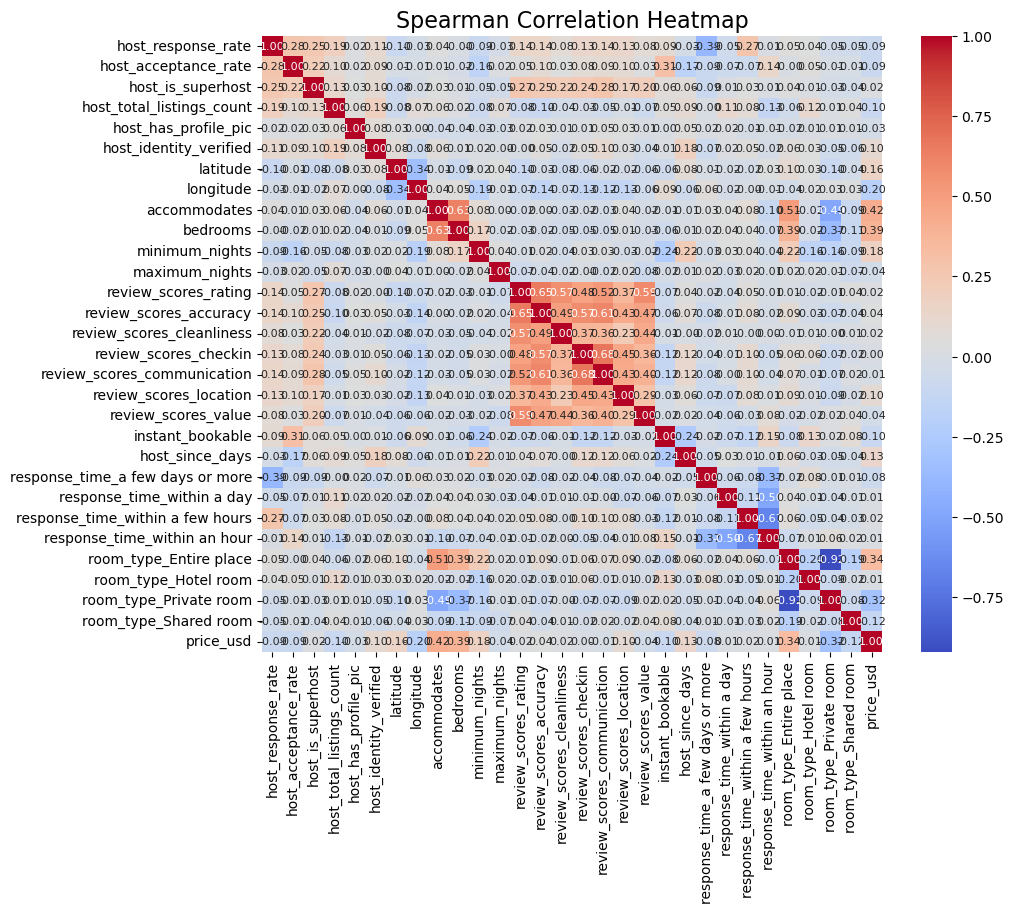

In [20]:
#Spearman Correlation Heatmap to see relationship between predictors
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Randomly sample from the dataset
sample_df = listings2.sample(n=1000, random_state=42)

# Calculate Spearman correlation matrix directly from the DataFrame
spearman_corr_df = sample_df.corr(method='spearman')

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(spearman_corr_df, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Add title
plt.title('Spearman Correlation Heatmap', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

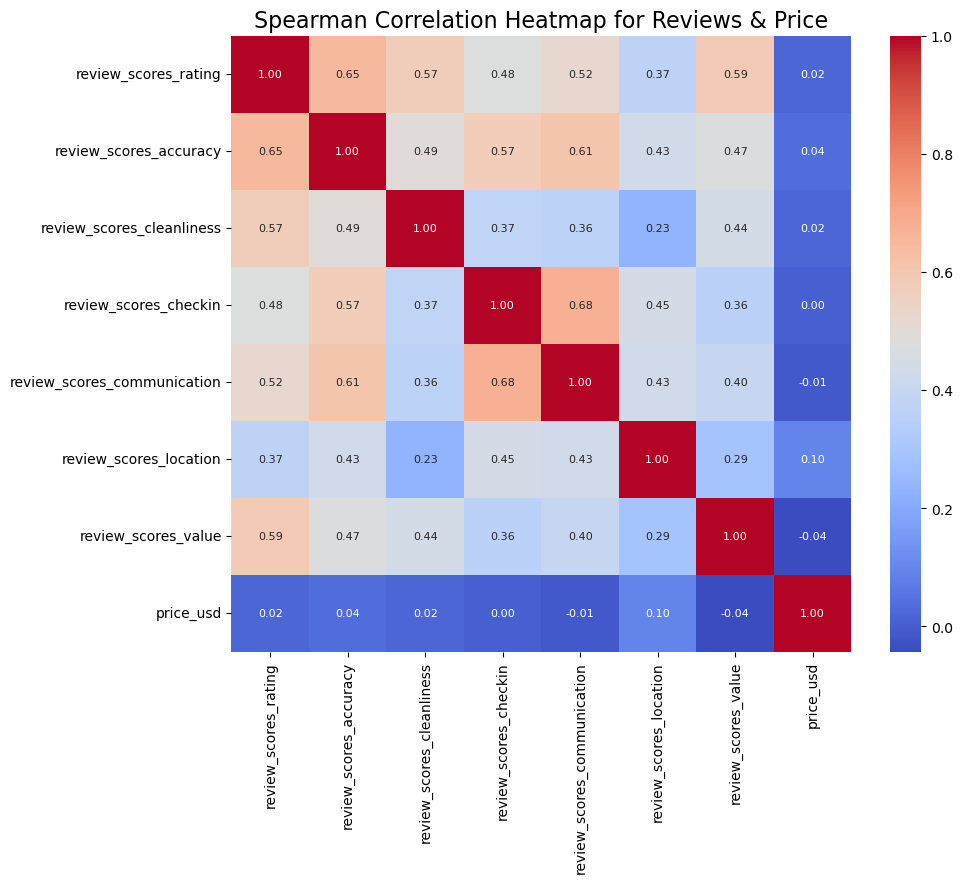

In [21]:
#Spearman Correlation Heatmap to see relationship between predictors
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Randomly sample from the dataset
sample_df = listings2[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication','review_scores_location',
                      'review_scores_value','price_usd']].sample(n=1000, random_state=42)

# Calculate Spearman correlation matrix directly from the DataFrame
spearman_corr_df = sample_df.corr(method='spearman')

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(spearman_corr_df, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Add title
plt.title('Spearman Correlation Heatmap for Reviews & Price', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

From the correlation matrix, we can identify a number of strongly correlated predictors such as:
- `accomodates` and `bedrooms`
- all the reviews predictors with each other:
    - `review_scores_rating` (overall)
    - `review_scores_accuracy`
    - `review_scores_cleanliness`
    - `review_scores_checkin`
    - `review_scores_communication`
    - `review_scores_location`
    - `review_scores_value`
    
Between accomodates and bedrooms, the former has a stronger correlation with the price.

The review predictors are definitely related to each other, but interestingly they don't have a strong correlation with the price of the listing. The reivew_scores_location) has the strongest correlation with coefficient value of 0.12.

## Feature Engineering

First split data into training and test

In [22]:
np.random.seed(123)

# split into training and test data (70-30)
X = listings2.drop(columns=['price_usd'])
y = listings2['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [23]:
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical data
scaler = StandardScaler()

# use .fit_transform() on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# use .transform() on test data to ensure we don't learn the test data mean and variances and to ensure we're on the same scale
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#### Using PCA to better understand the data

Component Loadings:


,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since_days,response_time_a few days or more,response_time_within a day,response_time_within a few hours,response_time_within an hour,room_type_Entire place,room_type_Hotel room,room_type_Private room,room_type_Shared room
PC1,-0.06,-0.01,-0.11,0.01,-0.01,-0.04,0.01,0.03,-0.01,-0.00,0.0,0.0,-0.41,-0.39,-0.36,-0.37,-0.38,-0.31,-0.39,0.03,-0.05,0.05,0.00,-0.01,-0.02,-0.04,0.02,0.03,0.02
PC2,-0.23,-0.17,-0.01,-0.04,0.01,0.06,-0.05,-0.01,0.39,0.32,-0.0,0.0,-0.00,-0.00,-0.01,-0.00,-0.01,0.01,-0.03,-0.13,0.09,0.24,0.18,0.16,-0.35,0.45,-0.08,-0.42,-0.04


Explained Variance Ratio:
[0.167 0.085]


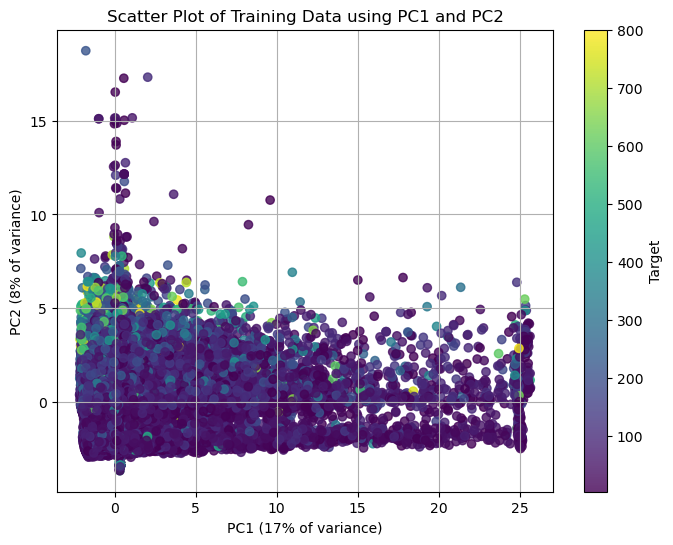

In [24]:
# Apply PCA
pca = PCA(n_components = 2)

# fit PCA to the scaled training data
pca.fit(X_train[numerical_cols])

# transform the scaled training data using the fitted PCA model
pca_features = pca.transform(X_train[numerical_cols])

# Create a DataFrame with PCA features
pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Concatenate PCA features with other features if needed
#final_df = pd.concat([sample_df.drop(columns=numerical_cols), pca_df], axis=1)

# Now 'final_df' contains the original non-numeric columns along with the PCA-transformed features


# fetch component loadings (eigenvectors)
component_loadings = pca.components_
component_loadings_df = pd.DataFrame(component_loadings, columns=X_train[numerical_cols].columns, index=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

print("Component Loadings:")
display(component_loadings_df.round(2))

# how much variance does each PC explain?
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio.round(3))

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.0f}% of variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.0f}% of variance)')
plt.title('Scatter Plot of Training Data using PC1 and PC2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

**Comment**: Our first 2 principle components only explain a total of 25.2% of the variance - PC1 explains 16.7% and PC2 explains 8.5%. Though we may not be able to use PCA for dimensionality reduction, we can still use its results to help us understand the covariates better. 

If we take a look at the component loadings, 
- PC1: This principal component captures all of the review predictor variables that we have. They all have a moderate negative influence on the PC. So listings that are lower in their ratings tend to have a greater value for PC1.
    - review_scores_rating (-0.41)
    - review_scores_accuracy (-0.39)
    - review_scores_cleanliness (-0.36)
    - review_scores_checkin (-0.37)
    - review_scores_communication (-0.38)
    - review_scores_location (-0.31)
    - review_scores_value (-0.39)
- PC2: This PC has moderate positive influence from accomodates, bedrooms, and if the room is the entire place. It has a negative influence from the response time is within an hour and if it is a private room. Therefore listings with a greater value for PC2 are units with a greater number of bedrooms, can accomodate more people, that are classified as the entire place and not a private room in a whole unit, and finally the host does not respond within an hour.  
    - accommodates (0.39)
    - bedrooms (0.32)
    - response_time_within an hour (-0.35)
    - room_type_Entire place (0.45)
    - room_type_Private room (-0.42)
    

#### Dimension reduction

In [25]:
# Drop predictors with 0 and 0.01 correlation coefficients
listings2.drop(['maximum_nights','host_has_profile_pic','host_response_rate'], axis = 1, inplace = True)

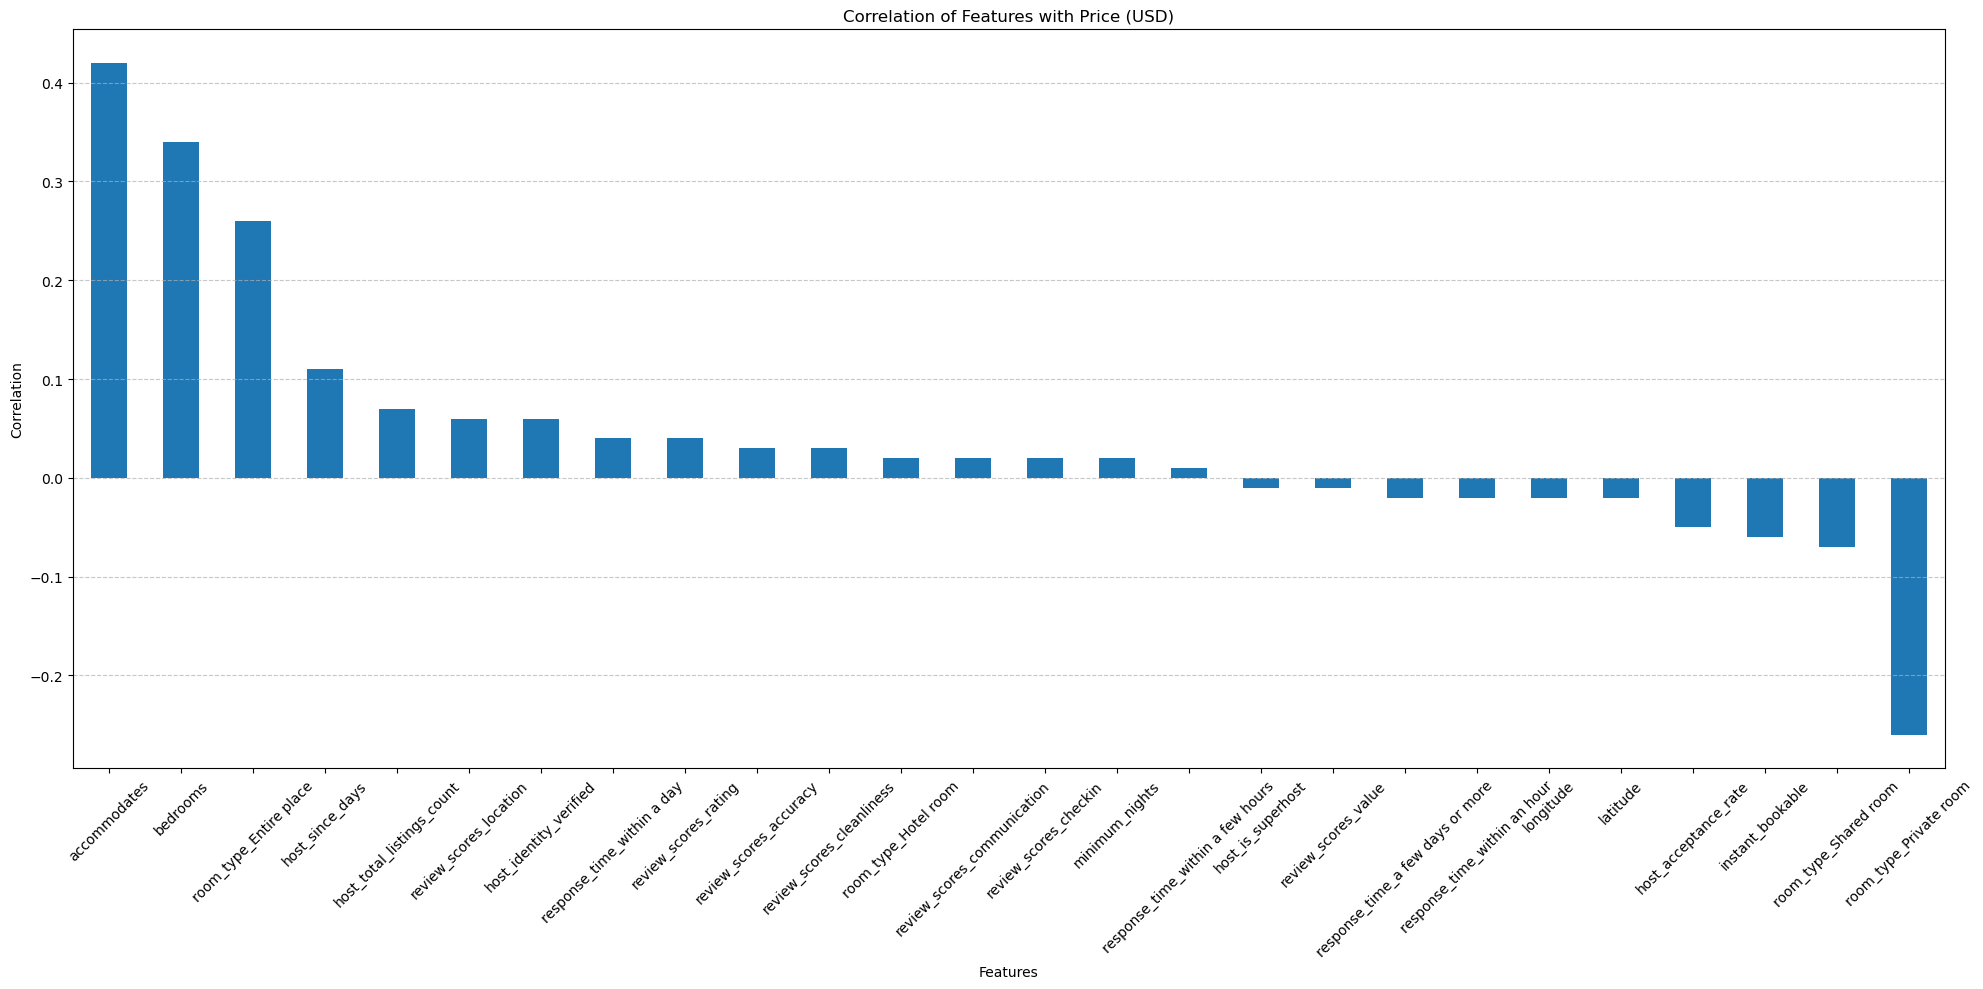

In [50]:
# Plot correlation of each potential feature with our response variable
corr = listings2.corr().round(2).sort_values(by='price_usd', ascending=False)
corr_w_price = corr['price_usd'][1:]

plt.figure(figsize=(20, 10))
corr_w_price.plot(kind='bar')
plt.title('Correlation of Features with Price (USD)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see from the bar chart above that the features that have the strongest correlation with price are accomodates, bedrooms, room_type_entire place, how long a host has been a host (postive) and for room_type_Private room (negative).

This makes sense since the typically the more people that a unit can host, the larger unit and therefore more square footage and more the host can charge. Additionally, the more private a listing is, the more a host can charge. Interestingly the host_acceptance_rate and instant_bookable have negative correlation with price - indicating that the more selective a listing is, the higher the price.

Based on this chart and the list of correlation coefficients, we can see that maximum nights, response_rate, and host_has_profile_pic have no direct correlation with the price.

In [27]:
np.random.seed(123)

# Initialize RFE with Linear Regression
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select = None)

# Fit RFE to Training Data
rfe.fit(X_train[numerical_cols], y_train)
selected_features = X[numerical_cols].columns[rfe.support_]
print('Our selected features are:')
for feature in selected_features:
    print(feature)

Our selected features are:
host_response_rate
host_total_listings_count
accommodates
bedrooms
review_scores_rating
host_since_days
response_time_a few days or more
response_time_within a day
response_time_within a few hours
response_time_within an hour
room_type_Entire place
room_type_Hotel room
room_type_Private room
room_type_Shared room


# XAI Method: Mixed Effects Model

We will build a Mixed Effects Model to account for fixed effects
(the predictors) and random effects (the group variables that represent hierarchical data).

(array([ 3501.,  4864.,  9686., 18505., 36046., 51587., 38789., 18730.,
         7387.,  2826.]),
 array([1.15310047, 1.7062516 , 2.25940272, 2.81255385, 3.36570498,
        3.9188561 , 4.47200723, 5.02515835, 5.57830948, 6.1314606 ,
        6.68461173]),
 <BarContainer object of 10 artists>)

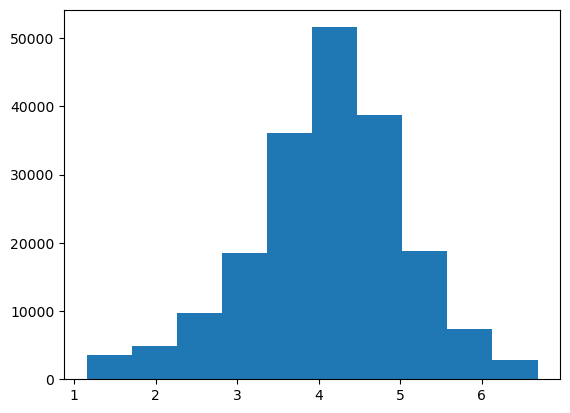

In [28]:
plt.hist(np.log(y_train))

In [29]:
X_train.columns = [col.replace(' ', '_') for col in X_train.columns]
X_test.columns = [col.replace(' ', '_') for col in X_test.columns]

In [30]:
listings3 = pd.concat([X_train, np.log(y_train)], axis = 1)
# Define the group variables
group_variables = ['neighbourhood', 'city', 'property_type']

# Convert group variables to categorical data type
for var in group_variables:
    listings3[var] = listings3[var].astype('category')

formula = 'price_usd ~ host_response_rate + host_identity_verified + host_total_listings_count + accommodates + bedrooms + review_scores_rating + host_since_days + response_time_within_an_hour + room_type_Entire_place + room_type_Private_room + room_type_Shared_room'


# Retry fitting the mixed effects model using the formula
mixed_model = smf.mixedlm(formula, listings3, groups=listings3[group_variables[0]]) #the group variable is neighborhood here

# Fit the model
mixed_results = mixed_model.fit()

# Print the summary of the mixed effects model
print(mixed_results.summary())


                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     price_usd   
No. Observations:       191921      Method:                 REML        
No. Groups:             650         Scale:                  0.3170      
Min. group size:        1           Log-Likelihood:         -163499.4670
Max. group size:        10301       Converged:              Yes         
Mean group size:        295.3                                           
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     3.995    0.027 146.619 0.000  3.941  4.048
host_response_rate           -0.022    0.001 -15.725 0.000 -0.025 -0.020
host_identity_verified       -0.031    0.001 -22.677 0.000 -0.033 -0.028
host_total_listings_count     0.051    0.001  39.193 0.000  0.048  0.

In [31]:
# p-value of group - neighbourhood
z = 0.449 / 0.047
pvalue = norm.sf(z)
print(pvalue)

6.288057571147305e-22


In [32]:
# Retry fitting the mixed effects model using the formula
mixed_model = smf.mixedlm(formula, listings3, groups=listings3[group_variables[1]]) #the group variable is city

# Fit the model
mixed_results = mixed_model.fit()

# Print the summary of the mixed effects model
print(mixed_results.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     price_usd   
No. Observations:       191921      Method:                 REML        
No. Groups:             10          Scale:                  0.3540      
Min. group size:        4847        Log-Likelihood:         -172764.0618
Max. group size:        44945       Converged:              Yes         
Mean group size:        19192.1                                         
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     3.978    0.191  20.804 0.000  3.604  4.353
host_response_rate           -0.018    0.001 -12.166 0.000 -0.021 -0.015
host_identity_verified       -0.021    0.001 -15.253 0.000 -0.024 -0.019
host_total_listings_count     0.053    0.001  38.874 0.000  0.050  0.

In [33]:
# p-value of group - city
z = 0.366 / 0.242
pvalue = norm.sf(z)
print(pvalue)

0.06521648769976245


In [34]:
# Retry fitting the mixed effects model using the formula
mixed_model = smf.mixedlm(formula, listings3, groups=listings3[group_variables[2]]) #the group variable is property type

# Fit the model
mixed_results = mixed_model.fit()

# Print the summary of the mixed effects model
print(mixed_results.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     price_usd   
No. Observations:       191921      Method:                 REML        
No. Groups:             135         Scale:                  0.6826      
Min. group size:        1           Log-Likelihood:         -235900.1004
Max. group size:        96747       Converged:              Yes         
Mean group size:        1421.6                                          
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     3.946    0.054  73.020 0.000  3.840  4.051
host_response_rate           -0.028    0.002 -13.359 0.000 -0.032 -0.024
host_identity_verified        0.036    0.002  18.415 0.000  0.032  0.039
host_total_listings_count     0.063    0.002  32.631 0.000  0.059  0.

In [35]:
# p-value of group - property type
z = 0.219 / 0.048
pvalue = norm.sf(z)
print(pvalue)

2.5274046817844165e-06


# SHAP (XAI Method)

We will implement the SHAP model in order to understand predictions from complex models. Given that our dataset has a variety of predictors and a large number of entries, we can use SHAP to assign each predictor a value for prediction.

In [37]:
import shap
from sklearn.ensemble import RandomForestRegressor

100%|===================| 38381/38385 [31:00<00:00]        

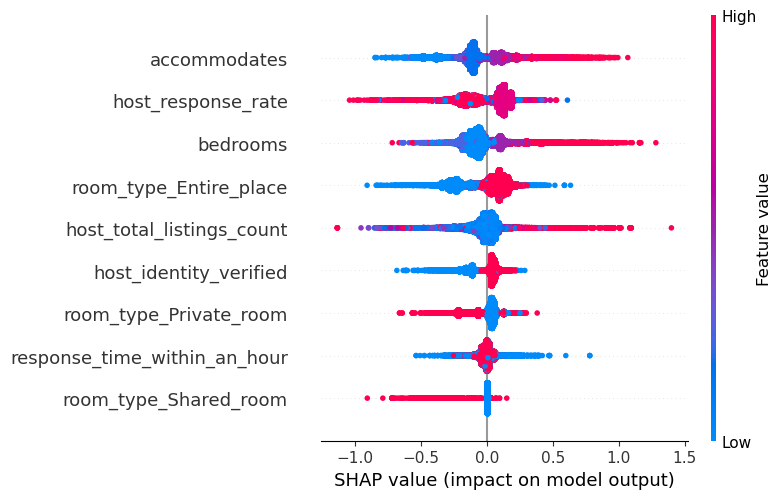

In [38]:
# Define predictor variables for the surrogate model (selecting numeric variables that can explain the impact on sale price)
X = listings3[['host_response_rate', 'host_identity_verified', 'host_total_listings_count', 'accommodates', 'bedrooms', 'room_type_Entire_place', 'room_type_Private_room', 'room_type_Shared_room', 'response_time_within_an_hour']]
# 'review_scores_rating', 'host_since_days'
y = listings3['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a surrogate model (e.g., random forest)
surrogate_model = RandomForestRegressor(n_estimators=100)
surrogate_model.fit(X_train, y_train)

# Initialize the SHAP explainer with the surrogate model
explainer = shap.Explainer(surrogate_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Plot summary plot
shap.summary_plot(shap_values, X_test)
